## 3. EDA


In [11]:
import numpy as np
import pandas as pd
import glob
import re
from datetime import datetime


import warnings
import pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
%matplotlib inline 



In [2]:
#local:
#path = "/"

# remote:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/module_6/"



Mounted at /content/drive


In [7]:
!pip install pandas-profiling

## READ DATA:

In [3]:
data = pd.read_csv(path + "PROCESSED/data.csv")
data.head().T


0  ...                          4
brand                          SKODA  ...                      SKODA
model_name            Skoda Fabia II  ...  Skoda Fabia II Рестайлинг
body_type     station wagon 5 doors.  ...         hatchback 5 doors.
doors                              5  ...                          5
model_date                      2007  ...                       2010
prod_date                       2009  ...                       2011
color                          black  ...                      black
engine_V                         1.4  ...                        1.2
power                             86  ...                         70
fuel                          petrol  ...                     petrol
mileage                       182200  ...                     190000
transmission                      MT  ...                         MT
owners                             2  ...                          2
pass                        Original  ...                   Original
drive                            FWD  ...                        FWD
wheel                           Left  ...                       Left
price                         370000  ...                     290000
test_train                     train  ...                      train
dataset_year                    2021  ...                       2021
model_age                         14  ...                         11
new_model                         no  ...                         no
car_age                           14  ...                         11
new_car                           no  ...                         no
retro                             no  ...                         no
raritet                           no  ...                         no
electrocar                        no  ...                         no
petrol_car                       yes  ...                        yes
1_owner                           no  ...                         no

[28 rows x 5 columns]

In [4]:
num_columns = list(pd.read_csv(path + "PROCESSED/num_columns.csv", header=None)[0])
cat_columns = list(pd.read_csv(path + "PROCESSED/cat_columns.csv", header=None)[0])
bin_columns = list(pd.read_csv(path + "PROCESSED/bin_columns.csv", header=None)[0])


In [5]:
num_columns, cat_columns, bin_columns


(['car_age',
  'power',
  'engine_V',
  'model_date',
  'model_age',
  'mileage',
  'prod_date'],
 ['body_type',
  'fuel',
  'model_name',
  'brand',
  'drive',
  'doors',
  'color',
  'owners',
  'transmission'],
 ['new_car',
  'new_model',
  'dataset_year',
  'pass',
  'retro',
  '1_owner',
  'wheel',
  'electrocar',
  'raritet',
  'petrol_car'])

#### Before all category feature turned into numbers, perform analysis using pandas_profiling library:

In [16]:
# train_profile = data[data.test_train=="train"].profile_report()
# train_profile.to_file(path + "REPORTS/train_profile_report.html")


https://drive.google.com/file/d/1qdTlhAtrnxrPHfAD-LtEl3rgC2esinHb/view?usp=sharing

In [17]:
# test_profile = data[data.test_train=="test"].profile_report()
# test_profile.to_file(path +"REPORTS/test_profile_report.html")


https://drive.google.com/file/d/1sS6ypIq1y7_Gp2m-V75g_JdZdLmkLJoe/view?usp=sharing

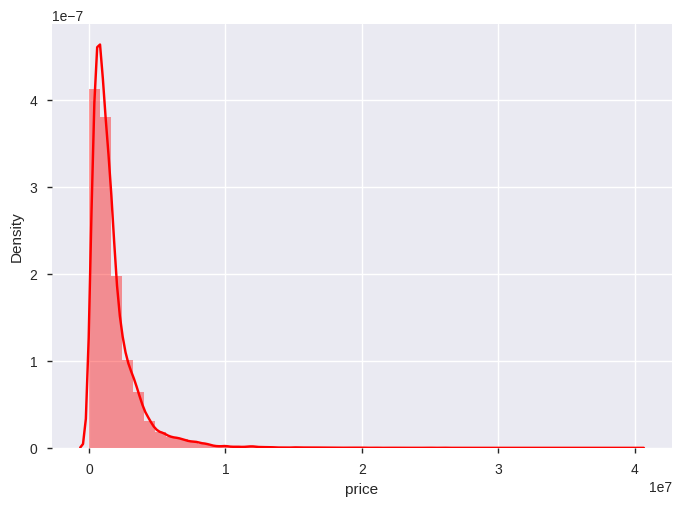

In [18]:
# distribution of target variable:
sns.distplot(data[data.test_train=="train"].price,color="r",kde=True)


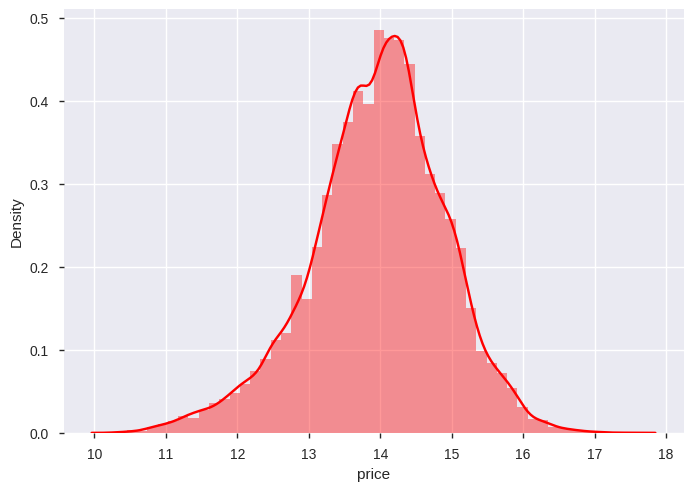

In [26]:
# ... long right tail, try to log:
sns.distplot(
    np.log((data[data.test_train=="train"].price+1)), 
    color="r",
    kde=True
    )

distribution looks more normal now...Need to keep in mind and use for prediction

## CATEGORICAL COLUMNS

Let's take a look at categorical columns' distribution and their impact on price:

In [21]:
len(cat_columns)


9

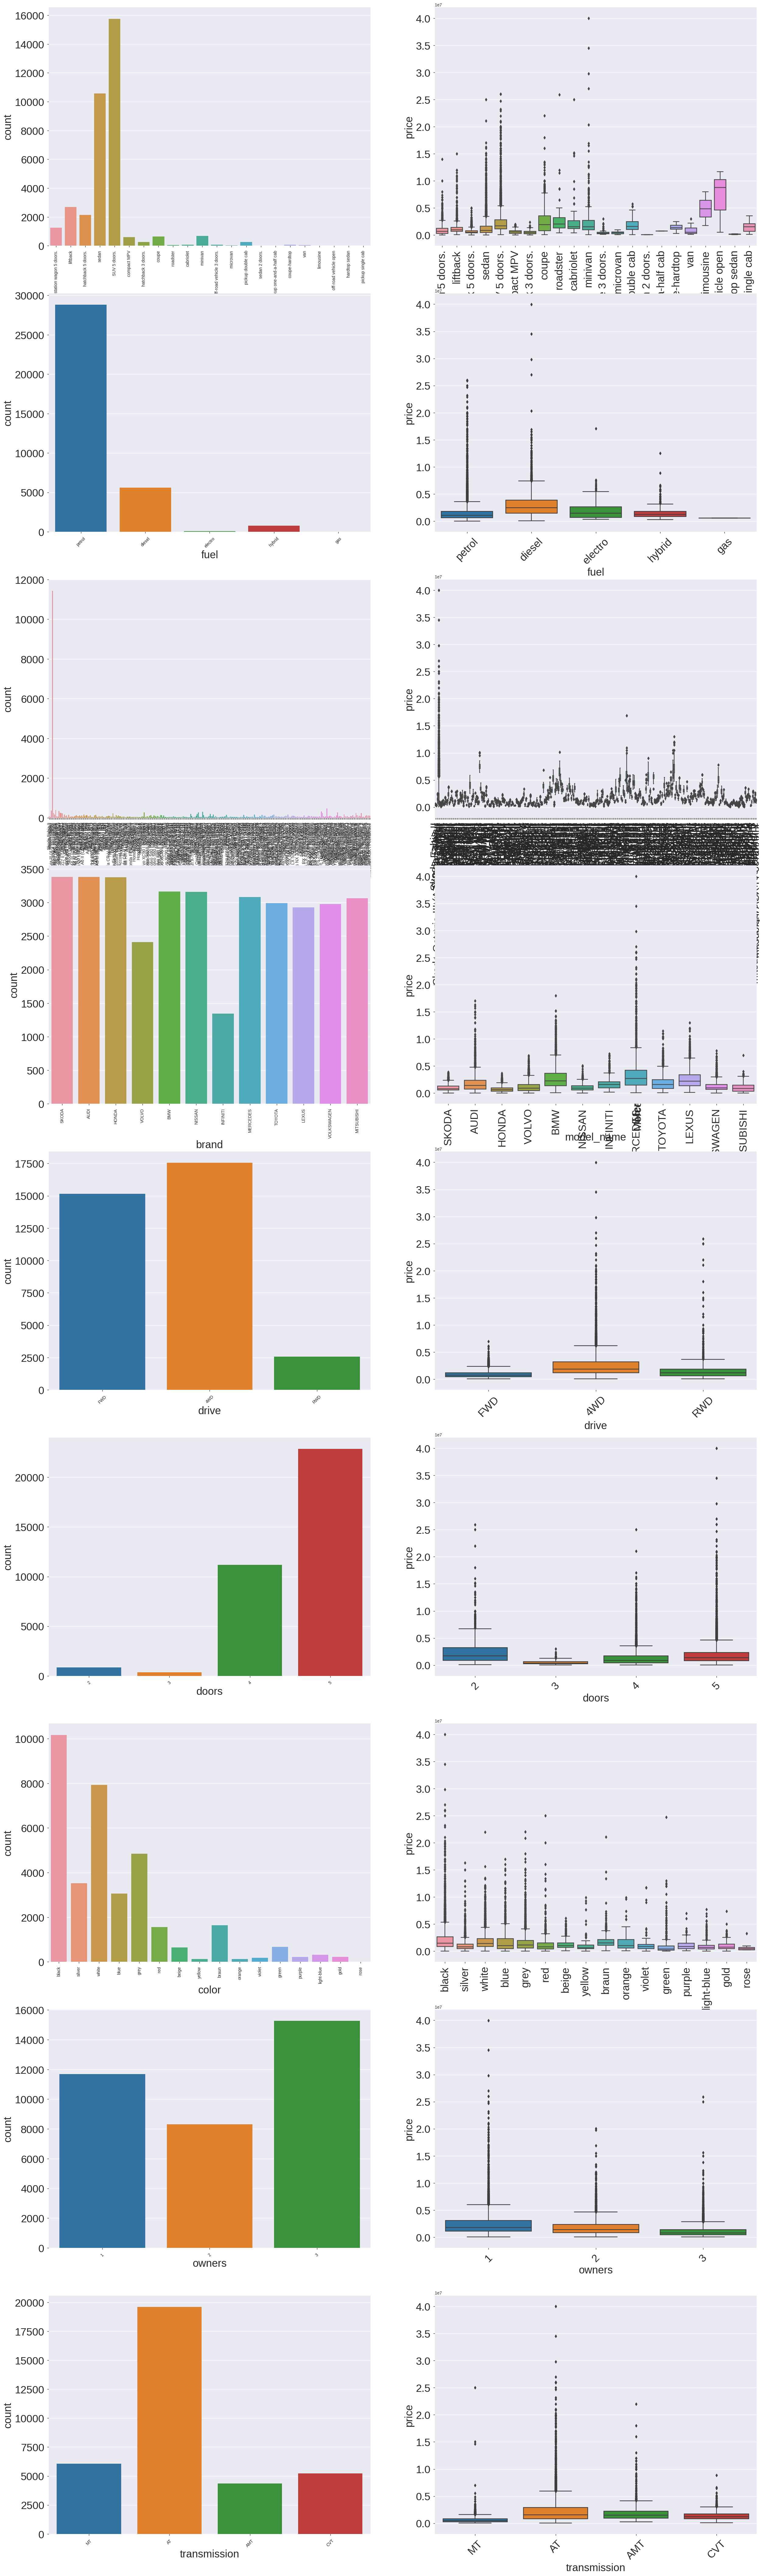

In [30]:
i=1
plt.figure(figsize=(30,120))
for col in cat_columns:
    if data[col].nunique()>5:
        angle=90
    else:
        angle=45
    
    plt.subplot(10,2,i)
    sns.countplot(data[data.test_train=="train"][col])
    plt.xticks(fontsize=10, rotation=angle)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    
    i=i+1
    plt.subplot(10,2,i)
    sns.boxplot(x=data[data.test_train=="train"][col],y=data[data.test_train=="train"]["price"])
    plt.xticks(fontsize=25, rotation=angle)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("price",fontsize=25)
    i=i+1

plt.show()

  petrol cars are most represented, but diesel are more expensive

  the most expensive and mostly represented model name  - “other”

  skoda, audi and honda are more frequent, but BMW and Mercedes are more expensive 
  
  Infinity count is two times less

  full drive is leading by count and price

  5-door cars are absolute leaders by count, but 2-door are more expensive

  number of black cars is so big that it could have an impact, fortunately,  black cars are not much more expensive; rose, yellow, green are cheaper

  cars having more than 2 owners are most frequent, those which have only one - more expensive
  
  Automatic transmission is more expensive and more frequent

Let's take a look at the latest models (just in case someone is interested :))

In [32]:
data_last5years = data[(data.test_train=="train") & (data.car_age<=5) & (data.car_age>0) ]
data_last5years.shape


(5793, 29)

now we are closer to electrocars' age. Repeate the step before:


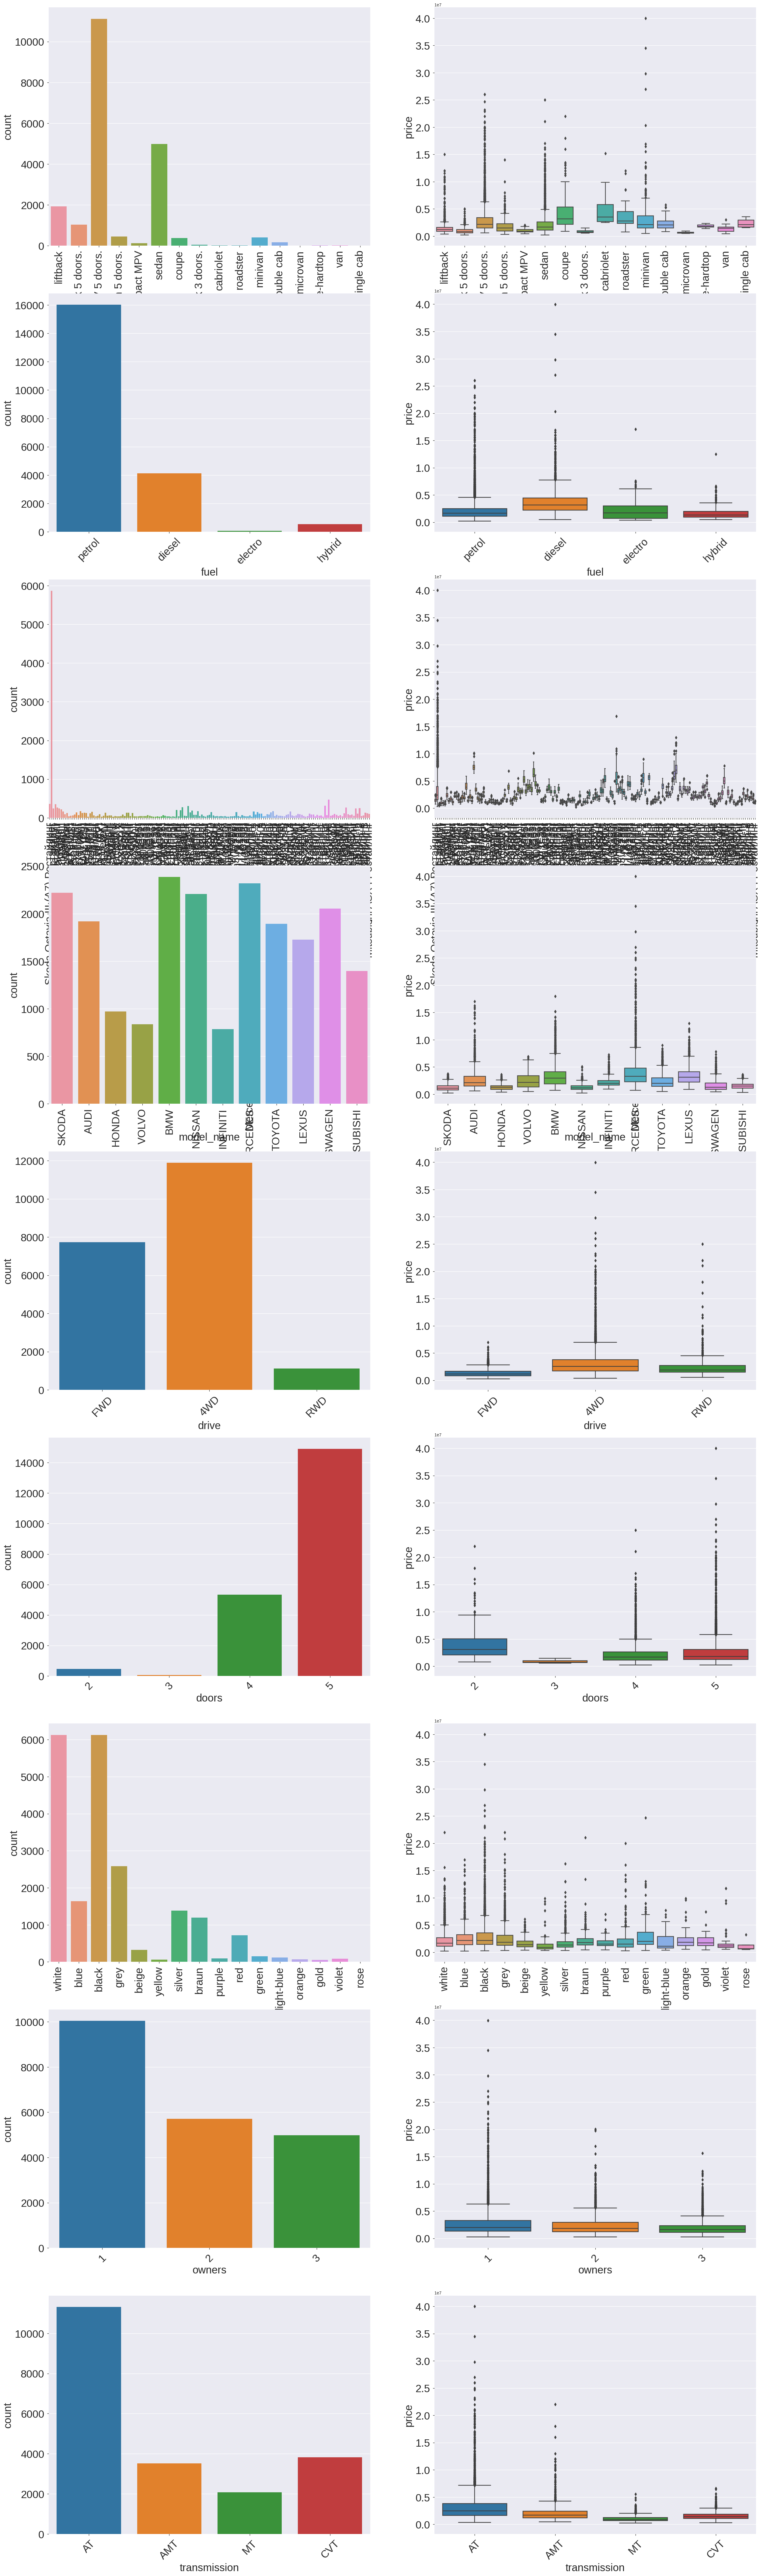

In [33]:
# for cars under 8 years excluding new cars:
i=1
plt.figure(figsize=(30,120))
for col in cat_columns:
    if data_last8years[col].nunique()>5:
        angle=90
    else:
        angle=45
    
    plt.subplot(10,2,i)
    sns.countplot(data_last8years[col])
    plt.xticks(fontsize=25, rotation=angle)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    
    i=i+1
    plt.subplot(10,2,i)
    sns.boxplot(x=data_last8years[col],y=data_last8years["price"])
    plt.xticks(fontsize=25, rotation=angle)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("price",fontsize=25)
    i=i+1

plt.show()


cabriolet, diesel, BMW or Mercedes, 4WD(такие бывают?), 2-doors, black or green, 1 owner, with automatic transmission. OK. Expensive. Good to know.


## BINARY COLUMNS:

In [34]:
bin_columns


['new_car',
 'new_model',
 'dataset_year',
 'pass',
 'retro',
 '1_owner',
 'wheel',
 'electrocar',
 'raritet',
 'petrol_car']

In [35]:
# don't need dataset_year:
bin_columns.remove("dataset_year")
bin_columns

['new_car',
 'new_model',
 'pass',
 'retro',
 '1_owner',
 'wheel',
 'electrocar',
 'raritet',
 'petrol_car']

In [36]:
len(bin_columns)


9

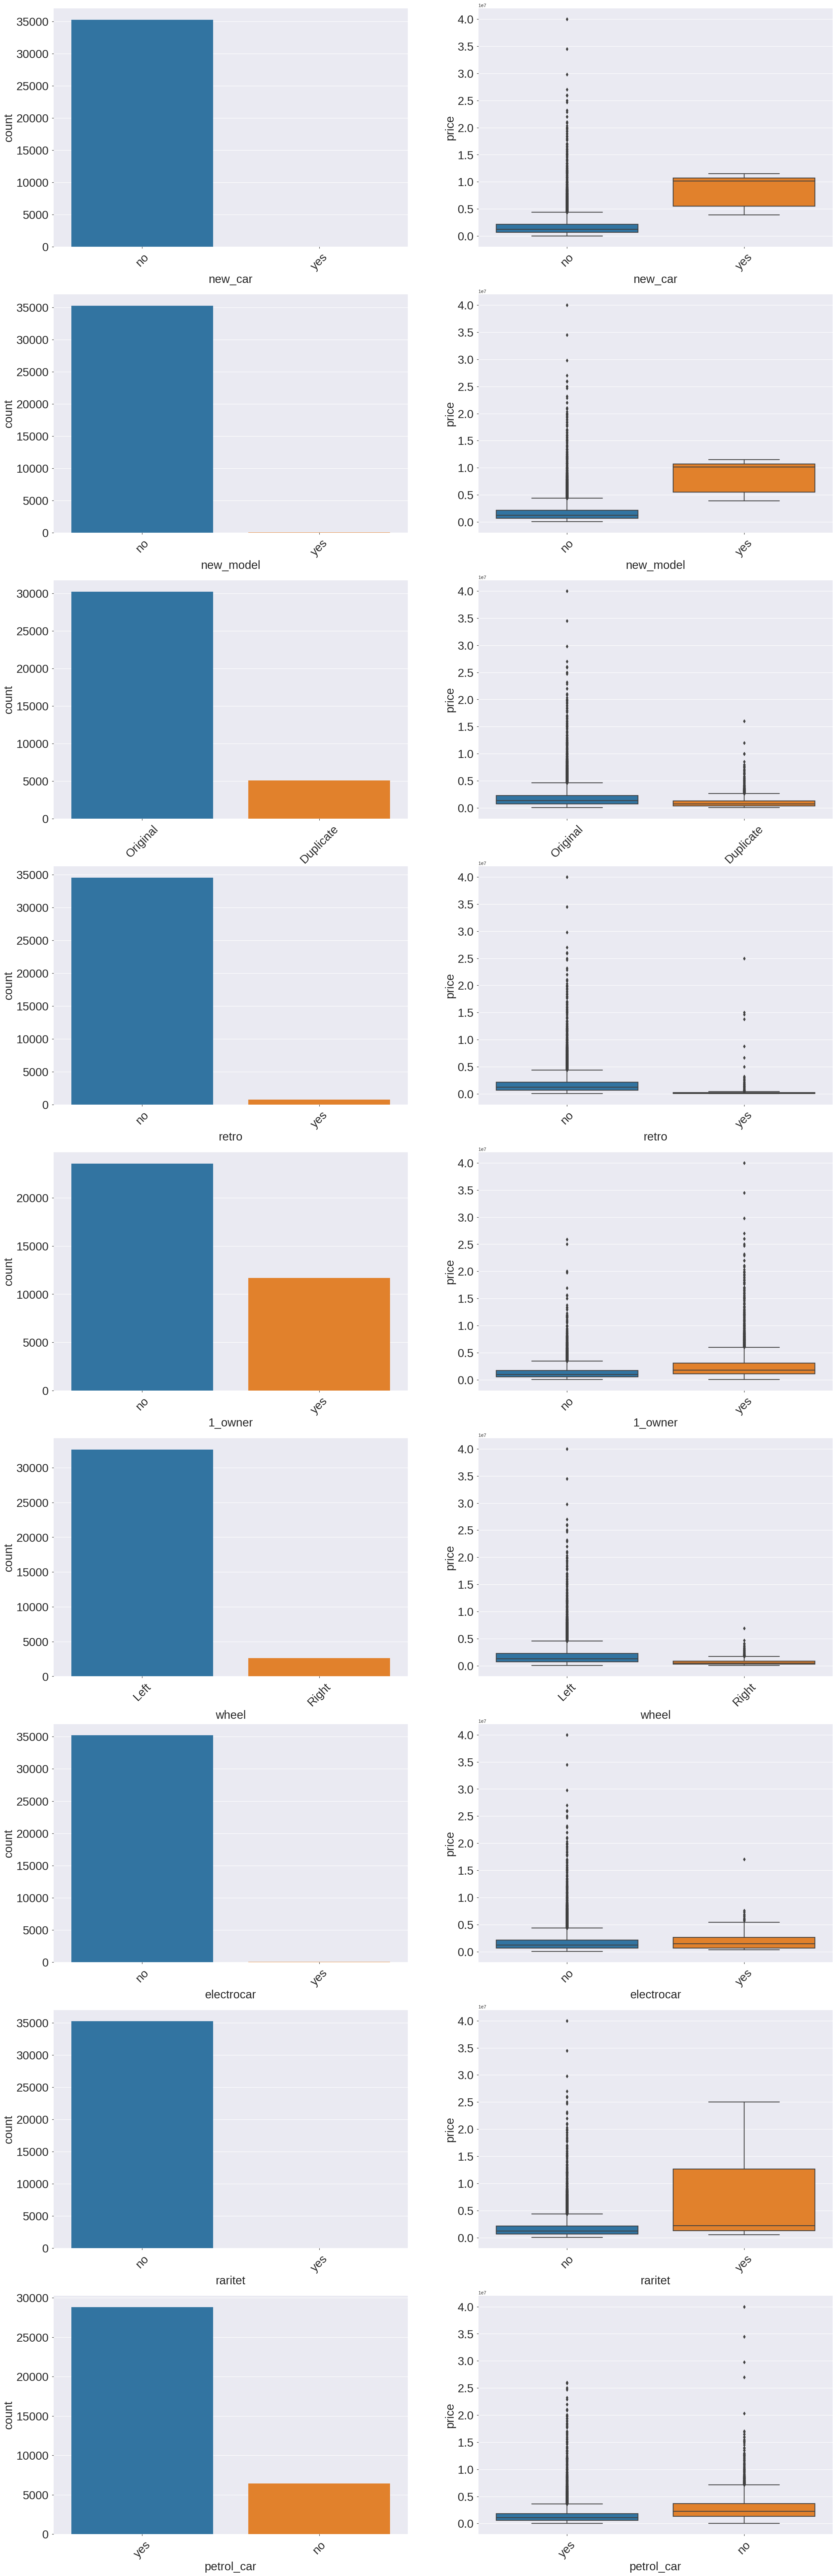

In [37]:
i=1
plt.figure(figsize=(30,120))
for col in bin_columns:
    if data[col].nunique()>5:
        angle=90
    else:
        angle=45
    
    plt.subplot(11,2,i)
    sns.countplot(data[data.test_train=="train"][col])
    plt.xticks(fontsize=25, rotation=angle)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    
    i=i+1
    plt.subplot(11,2,i)
    sns.boxplot(x=data[data.test_train=="train"][col],y=data[data.test_train=="train"]["price"])
    plt.xticks(fontsize=25, rotation=angle)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("price",fontsize=25)
    i=i+1

plt.show()


- there are very little of new cars but their price is much bigger,

- the same about new model

- duplicate passports are cheaper and there is less of them

- retro cars are cheaper,

- left steering wheel is leading on both

- electro cars are rare, and their price seems to be on the same level…

- ratite cars are rare but can be very expensive

- petrol cars are cheaper then others



## NUMERIC COLUMNS

In [39]:
num_columns

['car_age',
 'power',
 'engine_V',
 'model_date',
 'model_age',
 'mileage',
 'prod_date']

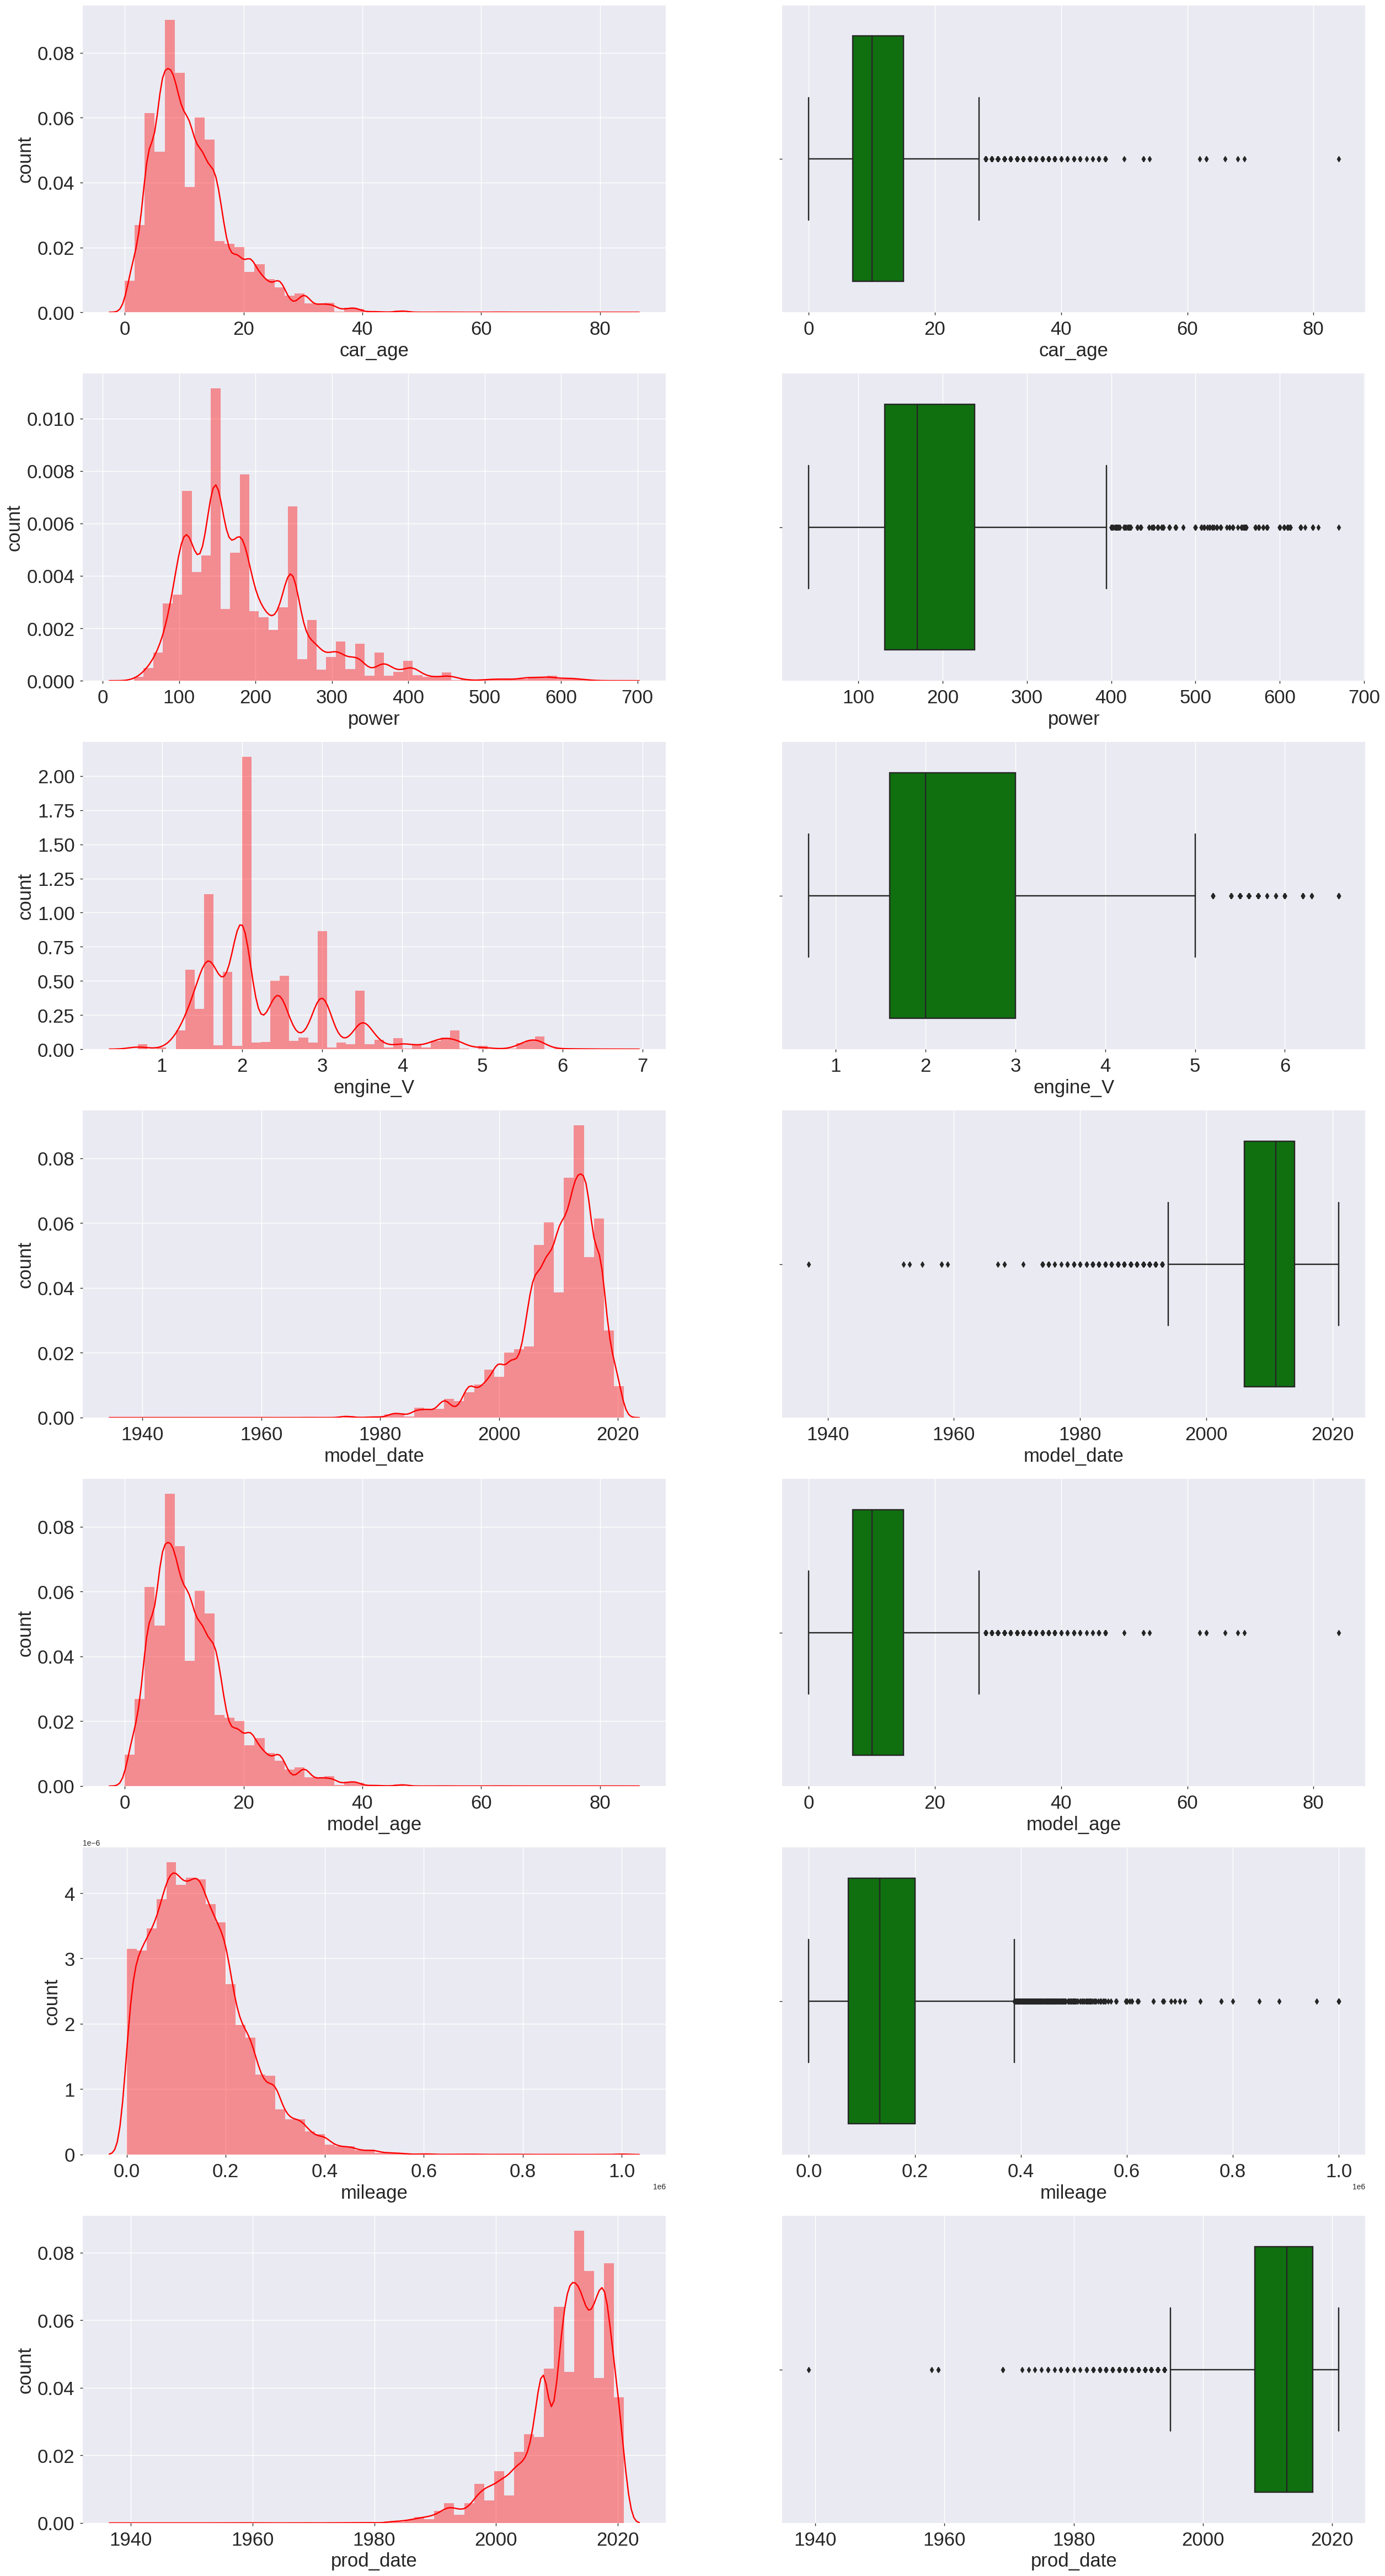

In [40]:
i=1
plt.figure(figsize=(30,120))
for col in num_columns:
    plt.subplot(14,2,i)
    sns.distplot(data[data.test_train=="train"][col],color="r")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    
    i=i+1
    plt.subplot(14,2,i)
    sns.boxplot(data[data.test_train=="train"][col],color="green")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    i=i+1

plt.show()

all numeric features have tails, we will use log function to make the distribution look more normal

## CORRELATION 

In [41]:
#checking the correlation between the pair of columns
data[data.test_train=="train"].corr()


doors  model_date  prod_date  ...  model_age   car_age  price_log
doors         1.000000    0.211647   0.221651  ...  -0.211647 -0.211647   0.169818
model_date    0.211647    1.000000   0.974917  ...  -1.000000 -1.000000   0.797427
prod_date     0.221651    0.974917   1.000000  ...  -0.974917 -0.974917   0.798915
engine_V      0.038873    0.025365   0.002827  ...  -0.025365 -0.025365   0.405585
power        -0.027172    0.229900   0.201030  ...  -0.229900 -0.229900   0.575116
mileage      -0.114142   -0.709933  -0.730803  ...   0.709933  0.709933  -0.644741
owners       -0.180752   -0.502578  -0.529165  ...   0.502578  0.502578  -0.428098
price         0.073346    0.519425   0.523797  ...  -0.519425 -0.519425   0.796881
dataset_year       NaN         NaN        NaN  ...        NaN       NaN        NaN
model_age    -0.211647   -1.000000  -0.974917  ...   1.000000  1.000000  -0.797427
car_age      -0.211647   -1.000000  -0.974917  ...   1.000000  1.000000  -0.797427
price_log     0.169818    0.797427   0.798915  ...  -0.797427 -0.797427   1.000000

[12 rows x 12 columns]

In [42]:
# is everything ok with dataset_year?
data.dataset_year.head()


0    2021
1    2021
2    2021
3    2021
4    2021
Name: dataset_year, dtype: int64

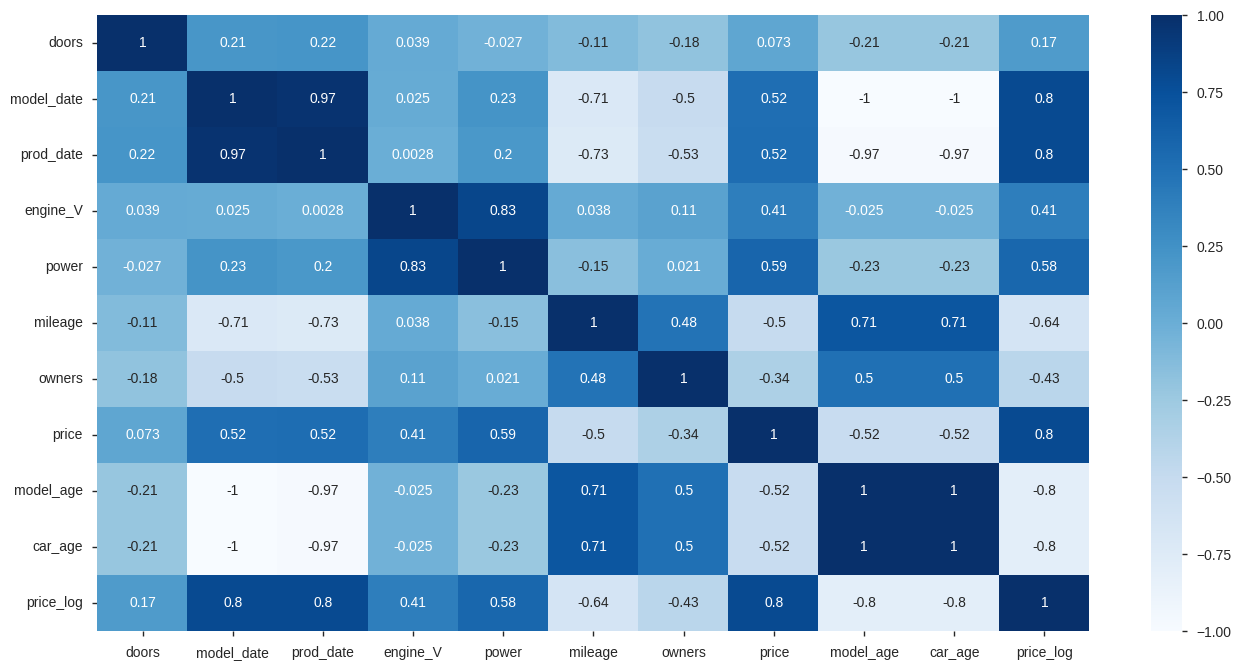

In [43]:
# heatmap 
plt.figure(figsize=(16,8))
sns.heatmap(data[data.test_train=="train"].drop("dataset_year", axis=1).corr(),annot=True, cmap="Blues")


In [44]:
# On the base on correlations, mark columns to drop and columns to logarith:
drop_columns = ["model_date", "prod_date", "dataset_year"]
log_columns = ["engine_V","power", "mileage", "model_age", "car_age"]
# convert to dataframes:
df_drop_columns = pd.DataFrame(drop_columns)
df_log_columns = pd.DataFrame(log_columns)
# save them to files:
df_drop_columns.to_csv(path + "PROCESSED/drop_columns.csv", mode='w', header=False, index=False)
df_log_columns.to_csv(path + "PROCESSED/log_columns.csv", mode='w', header=False, index=False)


####  Next: 4. Feature engineering

